
### 1. Carga de Datos y Preprocesamiento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

En primer lugar, cargamos los datos y mostramos algunas filas:

In [2]:
training_data = pd.read_csv("Data/training_set_features.csv", index_col="respondent_id")
training_labels = pd.read_csv("Data/training_set_labels.csv", index_col="respondent_id")
test_set_features = pd.read_csv("Data/test_set_features.csv", index_col="respondent_id")
training_data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


Este dataset contiene la información de individuos que han respondido acerca de diferentes cuestiones relacionadas con la gripe H1N1 y la gripe estacional en 2009. El objetivo es predecir si el individuo ha recibido una vacuna, dos, o ninguna en función de diferentes cuestiones acerca de aspectos sociales, económicos, demográficos, de opinión y buenos hábitos frente a las enfermedades.

Observando el encabezado de los datos, ya podemos detectar que las variables numéricas hacen referencias a niveles de un factor (nombre de la variable), así como valores nulos que serán tratados más adelante.

Podemos ver la información referente a cada variable, así como el tipo de variable que es:

In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

Para realizar un correcto preprocesamiento de los datos, es necesario hallar los valores nulos, anómalos, duplicados

In [4]:
print(training_data.isnull().sum())

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [5]:
print(training_data.duplicated().sum())

0


Se aprecia también que en todas las columnas, prácticamente, hay valores perdidos, destacando sobre todo las variables de 'health_insurance', 'employment_industry' y 'employent_occupation', donde la no respuesta sesga prácticamente el 50% de los resultados para estas variables:

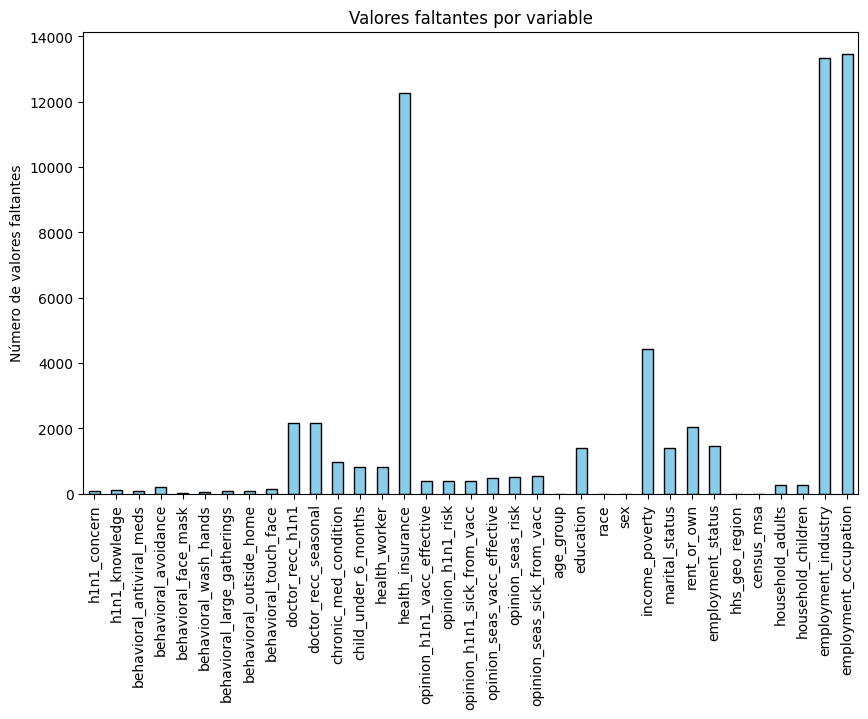

In [6]:
plt.figure(figsize=(10, 6))
training_data.isnull().sum().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Valores faltantes por variable')
plt.ylabel('Número de valores faltantes')
plt.show()


Podemos descartar directamente la columnas "employment_industry" , "employment_occupation" , "health_insurance", ya que la mayoría de valores en estas variables son faltantes. A continuación pasaremos a analizar los atributos de este dataset para determinar la mejor estrategia de imputación:

In [7]:
training_data.drop(["health_insurance"],axis=1,inplace=True)

In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

Ahora podemos ver si hay alguna otra columna cuyos valores perdidos sean también numerosos, decidiendo si es mejor eliminarlas o aplicar algún tipo de imputación

In [9]:
training_data.isnull().sum()/training_data.shape[0]

h1n1_concern                   0.003445
h1n1_knowledge                 0.004343
behavioral_antiviral_meds      0.002658
behavioral_avoidance           0.007788
behavioral_face_mask           0.000711
behavioral_wash_hands          0.001573
behavioral_large_gatherings    0.003258
behavioral_outside_home        0.003070
behavioral_touch_face          0.004793
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
opinion_h1n1_sick_from_vacc    0.014790
opinion_seas_vacc_effective    0.017299
opinion_seas_risk              0.019246
opinion_seas_sick_from_vacc    0.020107
age_group                      0.000000
education                      0.052683
race                           0.000000
sex                            0.000000
income_poverty                 0.165612


<Axes: ylabel='respondent_id'>

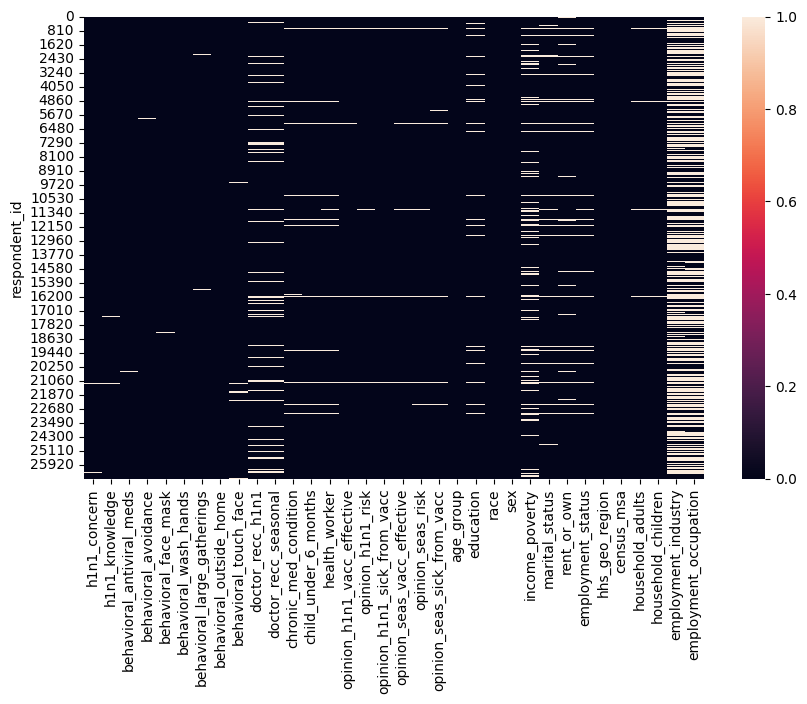

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(training_data.isnull())

#### Tratamiento de valores perdidos

Dado que ninguna variable presenta un alto ratio de valores perdidos ('income_poverty' es la variable que mayor número de valores perdidos tiene, un 16%), podemos optar por la imputación. Para aplicar esta técnica hay que tener en cuenta el tipo de variables que se tiene y las opciones disponibles en función de las características de las variables:

1. Variables ordinales numéricas

Estas columnas tienen valores numéricos que siguen un orden (ordinales) o son puramente cuantitativas (numéricas).
Estas variables suelen estar correlacionadas entre sí y con otras características, como el nivel educativo o el conocimiento de salud pública (h1n1_knowledge). Utilizar una imputación basada en regresión multivariada (p. ej., IterativeImputer) puede capturar mejor las relaciones entre variables ordinales numéricas y proporcionar valores más realistas. MICE (Multivariate Imputation by Chained Equations) captura relaciones multivariantes entre las variables, lo cual es crucial para columnas ordinales donde los valores tienen un orden natural, por lo que puede considerarse también como una buena alternativa.

2. Variables binarias

Son respuestas de sí/no que no tienen un orden ni valores intermedios.
Se puede optar, como manera sencilla, le imputación por la moda. Sin embargo, Random Forest es más robusto para manejar datos categóricos y puede capturar relaciones no lineales.


3. Variables ordinales de texto

Estas columnas tienen categorías con un orden lógico (por ejemplo, niveles de educación o rangos de edad).
Dado que estas variables tienen un orden jerárquico, la imputación con la moda es una estrategia simple y efectiva.


4. Variables categóricas nominales

Son variables que toman valores discretos (por ejemplo, 0, 1, 2, 3). Son categorías sin un orden implícito, que representan grupos o etiquetas. En columnas nominales, imputar con el valor más frecuente es suficiente, ya que no hay relaciones ordinales que KNN pueda aprovechar. Para capturar relaciones complejas entre las categorías y otras variables, Random Forest es mejor, especialmente para columnas como employment_status, que puede depender de factores como edad o ingresos.


5. Variables numéricas

Representan conteos y son continuas en teoría, aunque están limitadas a valores enteros.
Estas columnas suelen estar correlacionadas entre sí o con otras variables (por ejemplo, los ingresos del hogar o el estado civil podrían relacionarse con el número de adultos/niños en el hogar), por lo que KNNImputer es ideal para valores numéricos continuos cuando hay relaciones claras con otras columnas.

#### Codificación


Asímismo, todas las variables que contengan cadenas de texto han de ser codificadas en función de las características de las mismas:

- Para las variables ordinales de texto: Se ha usado un OrdinalEncoder para convertir estos valores textuales en valores numéricos (por ejemplo, "Nada preocupado" se convertiría en 0, "Poco preocupado" en 1, etc.), siguiendo el orden especificado en un diccionario de mapeo.

- Variables Binarias: Este tipo de variable es tratada como una categoría, por lo que no se necesita un tipo especial de codificación. Las variables binarias de texto también se codifican como números (0 y 1) mediante el OrdinalEncoder.

- Variables Categóricas Nominales: Se ha utilizado OneHotEncoder para estas columnas. Esta técnica es adecuada cuando las categorías no tienen un orden y quieres representar cada una de ellas de manera independiente.


In [11]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # Necesario para IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pandas as pd

# Función personalizada para manejar valores faltantes específicos
# Si el estado laboral es "Not in Labor Force" o "Unemployed", marcamos las columnas
# `employment_industry` y `employment_occupation` con el valor "Missing".
def mark_missing(df):
    df[['employment_industry', 'employment_occupation']] = df[['employment_industry', 'employment_occupation']].mask(
        df['employment_status'].isin(['Not in Labor Force', 'Unemployed']), 'Missing'
    )
    return df

# Variables ordinales (numéricas y de texto)
ordinal_cols = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
ordinal_cols_str = ['age_group', 'education', 'income_poverty']

# Variables binarias (numéricas y de texto)
binary_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
               'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1',
               'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker']
binary_cols_str = ['sex', 'marital_status', 'rent_or_own']

# Variables categóricas nominales (sin orden)
nominal_cols_str = ['race', 'employment_status', 'hhs_geo_region', 'census_msa']

# Variables numéricas
numeric_cols = ['household_adults', 'household_children']

# Mapeos de orden para columnas ordinales en formato de texto
ordinal_col_order = {
    'age_group': ['18 - 34 Years', '35 - 44 Years', '55 - 64 Years', '45 - 54 Years', '65+ Years'],
    'education': ['< 12 Years', '12 Years', 'Some College', 'College Graduate'],
    'income_poverty': ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000']
}

# Pipeline para columnas ordinales numéricas con MICE
ordinal_numeric_pipeline = Pipeline([
    ('iterative_imputer', IterativeImputer(max_iter=10, random_state=42))
])

# Pipeline para columnas ordinales de texto con imputación por moda y codificación ordinal
ordinal_str_pipeline = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=[ordinal_col_order[col] for col in ordinal_cols_str]))
])

# Pipeline para columnas binarias numéricas con imputación por Random Forest
binary_pipeline = Pipeline([
    ('iterative_imputer', IterativeImputer(random_state=42))
])

# Pipeline para columnas binarias de texto con imputación por moda y codificación ordinal
binary_str_pipeline = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

# Pipeline para columnas categóricas nominales con imputación por moda y codificación OneHot
nominal_pipeline = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),  # Aseguramos que no haya valores nulos antes del OneHot
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para columnas numéricas generales con KNNImputer
numeric_pipeline = Pipeline([
    ('knn_imputer', KNNImputer(n_neighbors=5))
])

# Preprocesamiento general con ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('ordinal_numeric', ordinal_numeric_pipeline, ordinal_cols),  # MICE para columnas ordinales numéricas
        ('ordinal_str', ordinal_str_pipeline, ordinal_cols_str),  # Imputación por moda + OrdinalEncoder para texto ordinal
        ('binary', binary_pipeline, binary_cols),  # Random Forest para columnas binarias numéricas
        ('binary_str', binary_str_pipeline, binary_cols_str),  # Imputación por moda + OrdinalEncoder para texto binario
        ('nominal', nominal_pipeline, nominal_cols_str),  # Moda + OneHot para columnas nominales
        ('numeric', numeric_pipeline, numeric_cols)  # KNNImputer para columnas numéricas
    ],
    remainder='drop'  # Elimina columnas no especificadas
)

# Pipeline general
data_preprocessing_pipeline = Pipeline([
    ('handle_missing_employment', FunctionTransformer(mark_missing, validate=False)),
    ('preprocessor', column_transformer)
])

# Aplicar el pipeline al dataset
preprocessed_data = data_preprocessing_pipeline.fit_transform(training_data)

# Generar nombres de columnas para el DataFrame final
output_columns = (
    ordinal_cols +
    ordinal_cols_str +
    binary_cols +
    binary_cols_str +
    list(data_preprocessing_pipeline.named_steps['preprocessor'].transformers_[4][1].named_steps['one_hot_encoder'].get_feature_names_out(nominal_cols_str)) +
    numeric_cols
)

# Convertir los datos procesados en DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=output_columns)

# Guardar el resultado en un archivo CSV
preprocessed_df.to_csv('preprocessed_training_dataset.csv', index=True)
preprocessed_df.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
0,1.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,2.0,5.0,4.0,4.0,4.0,2.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0
3,1.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


Una vez hemos aplicado todos los cambios anteriormente mencionados, podemos pasar a estudiar las características de nuestro dataset y las relaciones entre variables. Primero comprobamos que todas las columnas están preprocesadas:

In [12]:
print(preprocessed_df.shape)
print(preprocessed_df.isnull().sum())

(26707, 48)
h1n1_concern                            0
h1n1_knowledge                          0
opinion_h1n1_vacc_effective             0
opinion_h1n1_risk                       0
opinion_h1n1_sick_from_vacc             0
opinion_seas_vacc_effective             0
opinion_seas_risk                       0
opinion_seas_sick_from_vacc             0
age_group                               0
education                               0
income_poverty                          0
behavioral_antiviral_meds               0
behavioral_avoidance                    0
behavioral_face_mask                    0
behavioral_wash_hands                   0
behavioral_large_gatherings             0
behavioral_outside_home                 0
behavioral_touch_face                   0
doctor_recc_h1n1                        0
doctor_recc_seasonal                    0
chronic_med_condition                   0
child_under_6_months                    0
health_worker                           0
sex                   

In [13]:
preprocessed_df.describe()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.618295,1.262364,3.849066,2.341741,2.358514,4.024094,2.717659,2.119185,2.173962,2.036732,...,0.077807,0.160894,0.083985,0.107051,0.116149,0.436028,0.294455,0.269517,0.886499,0.534583
std,0.909092,0.616842,1.001211,1.278088,1.354546,1.078658,1.374485,1.321165,1.454646,1.000205,...,0.267873,0.367440,0.277371,0.309183,0.320410,0.495900,0.455806,0.443717,0.749901,0.923836
min,0.000000,0.000000,1.000000,0.828099,1.000000,1.000000,0.768294,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,2.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000


Podemos añadir las etiquetas al dataset para estudiar, a groso modo, las variables que mayor correlación presentan:

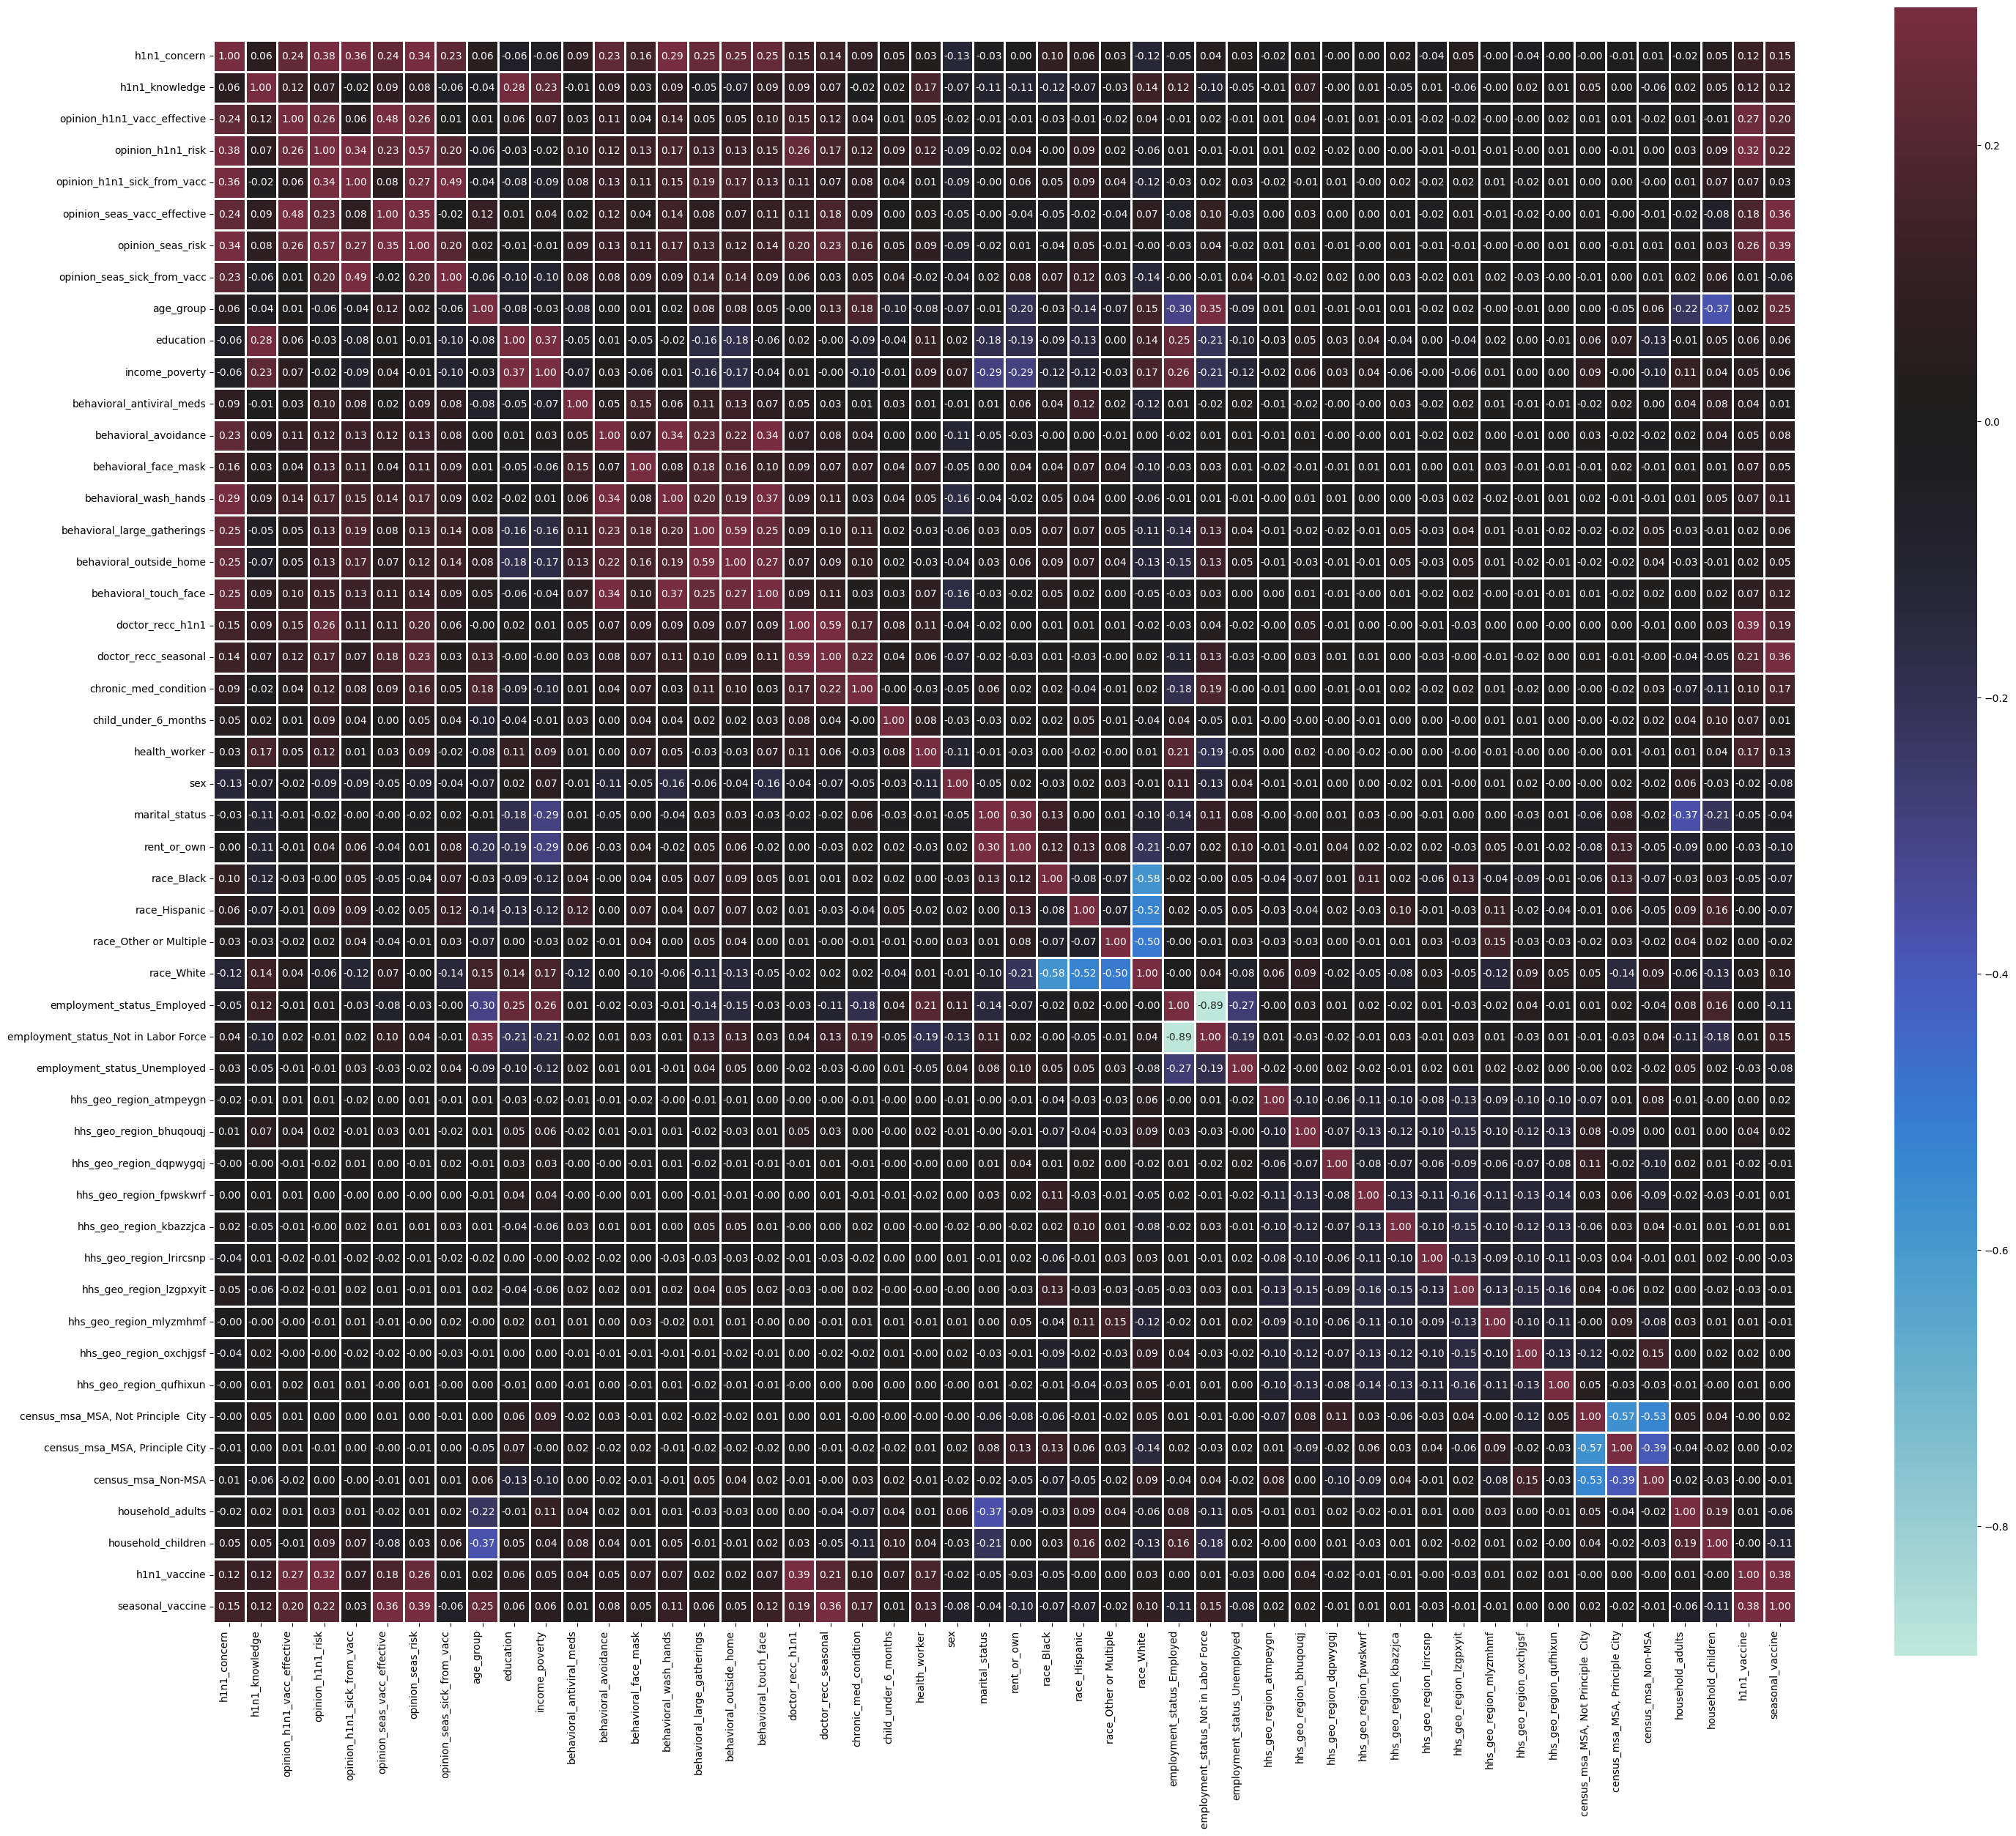

In [14]:
preprocessed_df_with_labels = pd.concat([preprocessed_df, training_labels], axis=1)

# Calcular la matriz de correlación
corr = preprocessed_df_with_labels.corr()

# Crear el heatmap de correlación
plt.figure(figsize=(30, 25))  # Asegúrate de que la figura tenga un tamaño adecuado

g = sns.heatmap(corr, vmax=.3, center=0,
                square=True, linewidths=1, annot=True, fmt='.2f')

# Ajustar los márgenes de la figura
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Rotar las etiquetas de los ejes para hacerlas más legibles
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar etiquetas del eje X
plt.yticks(rotation=0, ha='right', fontsize=10)   # Etiquetas del eje Y

# Mostrar el gráfico
plt.show()

A pesar de que no se han encontrado correlaciones positivas muy intensas ($\leq60\%$), si que se aprecian algunas correlaciones inversas más intensas entre las variables 'employment_status_employed' y 'employment_status_not in Labor Force', lo que nos hace pensar que las variables que mayor correlación tengan son redundantes en realidad.

Respecto de las etiquetas, las variables más influyentes son el haberse puesto la otra vacuna anteriormente, la recomendación del doctor o las opiniones de riesto y efectividad.

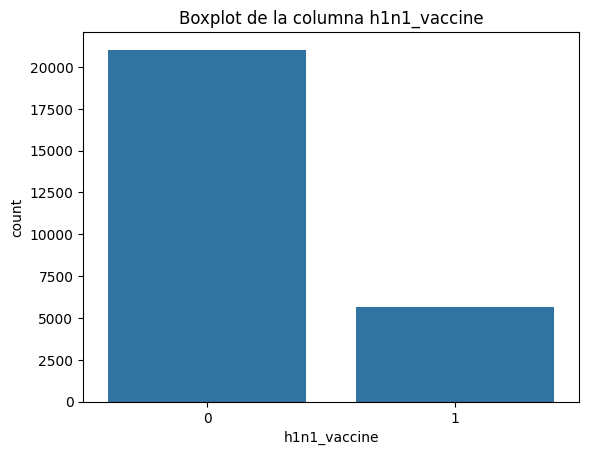

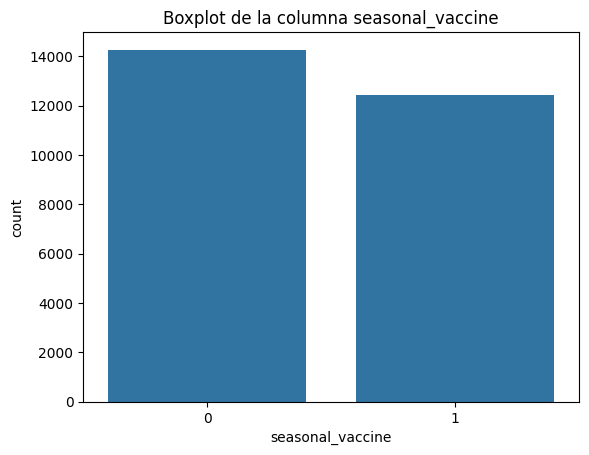

In [15]:
plt.figure()
sns.countplot(data=preprocessed_df_with_labels, x='h1n1_vaccine')
plt.title('Boxplot de la columna h1n1_vaccine')
plt.xlabel('h1n1_vaccine')
plt.figure()
sns.countplot(data=preprocessed_df_with_labels, x='seasonal_vaccine')
plt.title('Boxplot de la columna seasonal_vaccine')
plt.xlabel('seasonal_vaccine')
plt.show()


Parece que la vacuna H1N1 no ha sido aplicada a tantas personas, sobre todo en comparación con los que han recibido la vacuna estacional, podríamos sospechar que la concienciación y otras preguntas de opinión relacionadas con esta enfermedad también muestan signos de desconocimiento o desconfianza.

In [16]:
# Aplicar el mismo preprocesamiento al dataset de prueba
test_set_preprocessed = data_preprocessing_pipeline.transform(test_set_features)

# Generar los nombres de columnas para el DataFrame de prueba
output_columns = (
    ordinal_cols +
    ordinal_cols_str +
    binary_cols +
    binary_cols_str +
    list(data_preprocessing_pipeline.named_steps['preprocessor'].transformers_[4][1].named_steps['one_hot_encoder'].get_feature_names_out(nominal_cols_str)) +
    numeric_cols
)

# Convertir los datos transformados a un DataFrame
test_set_preprocessed_df = pd.DataFrame(test_set_preprocessed, columns=output_columns, index=test_set_features.index)

# Guardar el DataFrame preprocesado en un archivo CSV
test_set_preprocessed_df.to_csv("preprocessed_test_dataset.csv", index=True)
test_set_preprocessed_df.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26708,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
26709,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,2.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
26710,1.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26711,3.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
